# Input Parameter

In [43]:
Code = 'VOO'
Horizon = 13   # ---> Horizon
back_days = 50

# Call Libraries

In [44]:
%run Common.ipynb

In [45]:
ref_path = f"{RNN_PATH}/{Code}/Current/RNN_{Code}.csv"

ref_df = pd.read_csv( ref_path )
ref_record = ref_df[ref_df['Horizon'] == Horizon]

In [109]:
id = int(ref_record['id'].values[0])
p = int(ref_record['Seq_Len'].values[0])

In [50]:
model_path =  f"{RNN_PATH}/{Code}/Current/{id}_H{Horizon}/RNN_{Code}_H{Horizon}.keras"
model = load_model(model_path)

In [81]:
%run RNN_Predict.ipynb

[*********************100%***********************]  1 of 1 completed


Start Source From 2025-08-28 to 2025-11-06


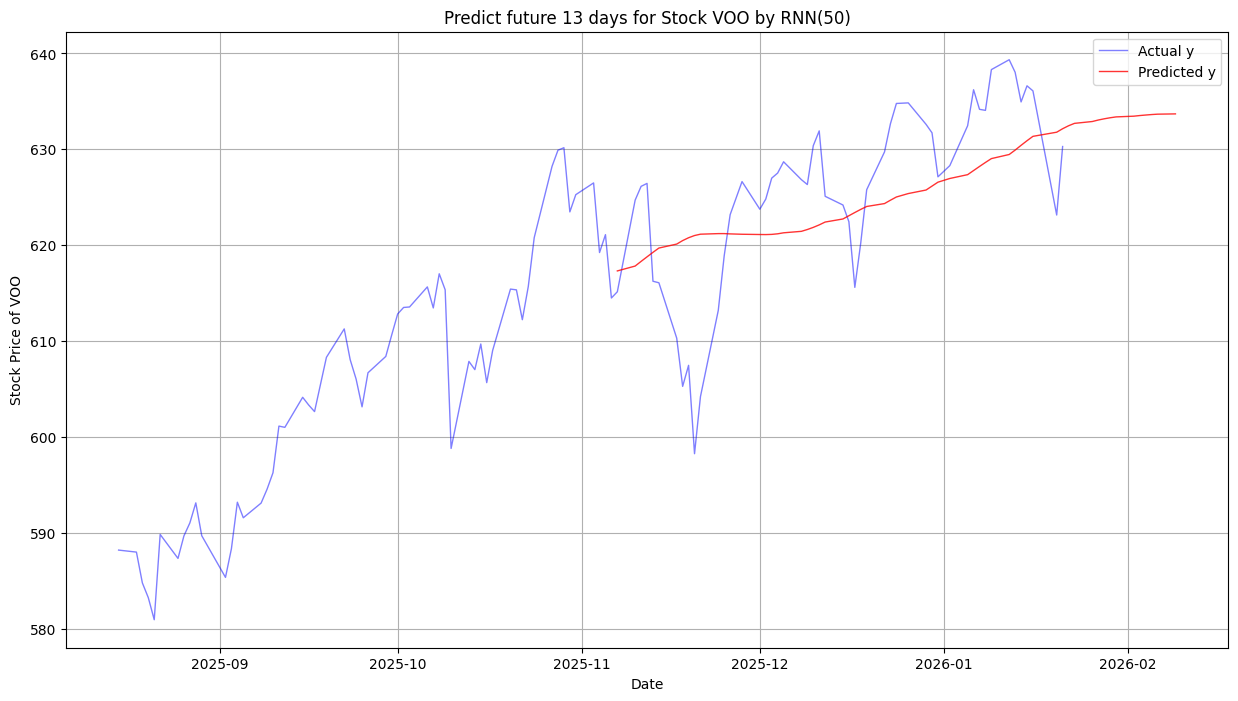

In [82]:
predict_result = main_rnn_predict(Code, Horizon , back_days, model, p )

In [113]:
predict_result.sort_values("Date")

src  = predict_result[ predict_result['Close_Pred'].isna()]['Date'].tolist()
pred = predict_result[~predict_result['Close_Pred'].isna()]['Date'].tolist()



print(f"use {src[0]} - {src[-1]} to predict {pred[0]}-{pred[-1]}")



use 2025-08-15 - 2025-11-06 to predict 2025-11-07-2026-02-09


In [104]:
predict_result

,Date,Close,Close_Pred
0,2025-08-15,588.218323,NaN
1,2025-08-18,588.009521,NaN
2,2025-08-19,584.797852,NaN
3,2025-08-20,583.256653,NaN
4,2025-08-21,580.959656,NaN
...,...,...,...
117,2026-02-03,NaN,633.520563
118,2026-02-04,NaN,633.574199
119,2026-02-05,NaN,633.624369
120,2026-02-06,NaN,633.663736
